In [10]:
#Dependencies
import os
import numpy as np
import tensorflow as tf
import PIL
import pandas as pd


import keras 
from keras.preprocessing import image
from keras.models import Model
from keras.models import load_model
from keras.utils import to_categorical
from keras.layers import Dense, GlobalAveragePooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg19 import (VGG19, preprocess_input, decode_predictions)

from sklearn.model_selection import train_test_split

In [5]:
# Trained Model
model = load_model("Xception_train_b10_ep10_SGD.h5")

In [6]:
test_batch = 'images_split/test'

In [7]:
test_datagen = ImageDataGenerator(rescale=1. / 255)

test_batches = test_datagen.flow_from_directory(
                                directory=test_batch,
                                target_size=(224,224),  
                                classes=['animals','beaches','birds','electronics','fashion','nature','landmarks','people'],                           
                                batch_size=5
                                )       

Found 374 images belonging to 8 classes.


In [8]:
predictions = model.predict_generator(test_batches, 10)

C:\Users\KenJ\Anaconda3\lib\site-packages\PIL\Image.py:888: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


In [9]:
predictions

array([[  4.81504792e-08,   8.46291925e-07,   6.21312267e-07,
          9.99884963e-01,   1.74803503e-07,   1.07476480e-04,
          5.52459824e-06,   3.56718175e-07],
       [  1.52818055e-03,   5.05876169e-03,   1.28701411e-03,
          7.07632065e-01,   5.02965297e-04,   9.56817493e-02,
          1.63114458e-01,   2.51948070e-02],
       [  5.23563131e-06,   1.49036016e-04,   1.74767702e-05,
          1.05440638e-04,   3.01409245e-01,   6.16183461e-05,
          2.92449258e-05,   6.98222756e-01],
       [  1.98008593e-06,   1.91819272e-05,   1.52005714e-05,
          9.99863386e-01,   1.34880975e-06,   3.45905173e-05,
          2.80354525e-05,   3.63088839e-05],
       [  5.80964879e-05,   7.49726532e-05,   1.34868693e-04,
          1.16510819e-04,   1.01645426e-04,   7.22506840e-04,
          9.98636425e-01,   1.54983369e-04],
       [  1.64339895e-06,   2.03600638e-02,   5.20147159e-06,
          3.05689682e-05,   4.67450536e-06,   5.10521233e-04,
          9.79057312e-01,   3.0

In [41]:
classes = ['animals','beaches','birds','electronics','fashion','nature','landmarks','people']

df = pd.DataFrame(data = predictions[0:,0:],
            columns = classes)
df

,animals,beaches,birds,electronics,fashion,nature,landmarks,people
0,4.815048e-08,8.462919e-07,6.213123e-07,9.998850e-01,1.748035e-07,0.000107,5.524598e-06,3.567182e-07
1,1.528181e-03,5.058762e-03,1.287014e-03,7.076321e-01,5.029653e-04,0.095682,1.631145e-01,2.519481e-02
2,5.235631e-06,1.490360e-04,1.747677e-05,1.054406e-04,3.014092e-01,0.000062,2.924493e-05,6.982228e-01
3,1.980086e-06,1.918193e-05,1.520057e-05,9.998634e-01,1.348810e-06,0.000035,2.803545e-05,3.630888e-05
4,5.809649e-05,7.497265e-05,1.348687e-04,1.165108e-04,1.016454e-04,0.000723,9.986364e-01,1.549834e-04
5,1.643399e-06,2.036006e-02,5.201472e-06,3.056897e-05,4.674505e-06,0.000511,9.790573e-01,3.000082e-05
6,7.226388e-07,7.240212e-07,4.388888e-06,9.999893e-01,9.589902e-07,0.000001,2.129294e-06,5.394629e-07
7,1.016800e-04,1.441727e-02,1.138100e-03,3.607141e-01,6.857417e-04,0.516798,9.458811e-02,1.155691e-02
8,8.001110e-01,6.714367e-03,1.700643e-02,4.882484e-03,2.407436e-02,0.001800,1.312383e-01,1.417356e-02
9,9.982964e-01,5.221252e-05,3.470774e-05,1.233288e-05,3.332359e-05,0.000087,1.460851e-03,2.352346e-05


In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

means = df.mean()
means

animals        0.177105
beaches        0.085041
birds          0.063503
electronics    0.107098
fashion        0.143468
nature         0.222568
landmarks      0.121614
people         0.079604
dtype: float32

In [28]:
errors = df.std()
errors

animals        0.362309
beaches        0.266536
birds          0.239261
electronics    0.288710
fashion        0.323769
nature         0.393532
landmarks      0.290576
people         0.210173
dtype: float32

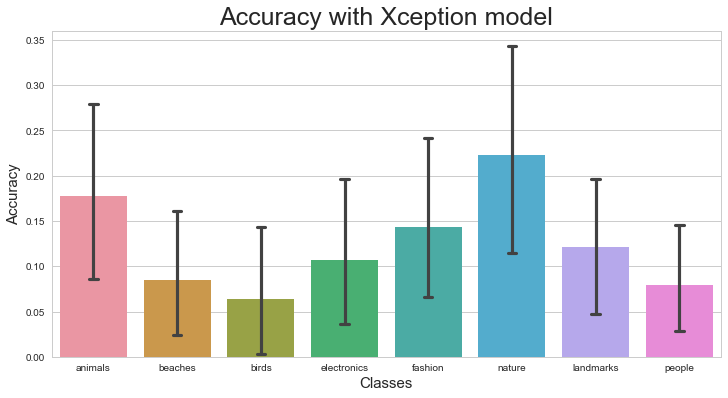

In [55]:
plt.figure(figsize=(12,6))
fig = sns.barplot(data=df, capsize=.1)
plt.xlabel("Classes", fontsize=15)
plt.ylabel("Accuracy", fontsize=15)
plt.title("Accuracy with Xception model", fontsize=25)
plt.show(fig)

In [56]:
d = {'Mean_Accuracy': means, 'Standard_Deviation': errors}
table_df = pd.DataFrame(data=d, index=classes)
table_df

,Mean_Accuracy,Standard_Deviation
animals,0.177105,0.362309
beaches,0.085041,0.266536
birds,0.063503,0.239261
electronics,0.107098,0.288710
fashion,0.143468,0.323769
nature,0.222568,0.393532
landmarks,0.121614,0.290576
people,0.079604,0.210173


In [13]:
from sklearn.metrics import confusion_matrix

0.12500001

In [43]:
y_true = np.reshape(np.array([1] * 400), (50, 8))
y_pred = predictions > 0.5

print (np.array(y_true).shape)
print (np.array(y_pred).shape)
confusion_matrix(y_true.argmax(axis=1), y_pred.argmax(axis=1))


(50, 8)
(50, 8)


array([[40, 10],
       [ 0,  0]], dtype=int64)

In [44]:
print (np.array(y_true))
print (np.array(y_pred))

[[1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]]
[[False False False False False False  True False